<a href="https://colab.research.google.com/github/sonnylewis1/TEXT-CLASSIFICATION/blob/master/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***IMPORTING OF THE NECESSARY LIBRARIES***

In [ ]:
import nltk
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

***DOWNLOADING RELEVANT RESOURCES FROM NLTK***

In [ ]:
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

***CHECKING THE CONTENT OF GUTENBERG*** 

In [ ]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

***ASSIGNING THE SELECTED TEXTS TO VARIABLES***

In [ ]:
text1 =  nltk.corpus.gutenberg.raw('austen-emma.txt')
text2 = nltk.corpus.gutenberg.raw('bible-kjv.txt')
text3 = nltk.corpus.gutenberg.raw('whitman-leaves.txt')
text4 = nltk.corpus.gutenberg.raw('milton-paradise.txt')
text5 = nltk.corpus.gutenberg.raw('melville-moby_dick.txt')
text6 = nltk.corpus.gutenberg.raw('edgeworth-parents.txt')
text7 = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
text8 = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
text9 = nltk.corpus.gutenberg.raw('bryant-stories.txt')

In [ ]:
print(text1)

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

***VIEWING THE NUMBER OF WORDS IN EACH TEXT***

In [ ]:
number_words_texts=[(len(nltk.word_tokenize(text1)),'austen-emma'),(len(nltk.word_tokenize(text2)),'bible-kjv'), (len(nltk.word_tokenize(text3)),'whitman-leaves'), 
                    (len(nltk.word_tokenize(text4)),'milton-paradise'), (len(nltk.word_tokenize(text5)),'melville-moby_dick'), 
                    (len(nltk.word_tokenize(text6)),'edgeworth-parents'), (len(nltk.word_tokenize(text7)),'chesterton-thursday'), 
                    (len(nltk.word_tokenize(text8)),'shakespeare-hamlet'), (len(nltk.word_tokenize(text9)),'bryant-stories')]
print(number_words_texts)

[(191673, 'austen-emma'), (946812, 'bible-kjv'), (149198, 'whitman-leaves'), (95709, 'milton-paradise'), (254989, 'melville-moby_dick'), (209090, 'edgeworth-parents'), (69408, 'chesterton-thursday'), (36326, 'shakespeare-hamlet'), (55621, 'bryant-stories')]


In [ ]:
n_o_w = pd.DataFrame(number_words_texts)
n_o_w = n_o_w.rename(columns={0: "Number of words", 1: "Text"})
print(n_o_w)

   Number of words                 Text
0           191673          austen-emma
1           946812            bible-kjv
2           149198       whitman-leaves
3            95709      milton-paradise
4           254989   melville-moby_dick
5           209090    edgeworth-parents
6            69408  chesterton-thursday
7            36326   shakespeare-hamlet
8            55621       bryant-stories


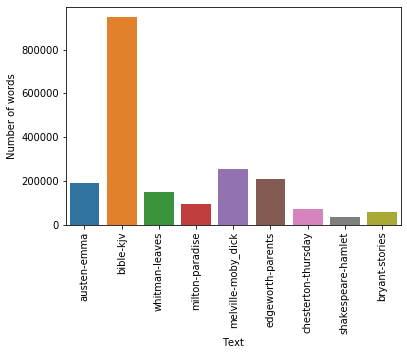

In [ ]:
sns.barplot(n_o_w['Text'],n_o_w['Number of words'],label="Number of Words")
plt.xticks(rotation=90)
plt.show()

***TOKENIZING THE SELECTED TEXTS INTO SENTENCES***

In [ ]:
sent1 = nltk.sent_tokenize(text1)
sent2 = nltk.sent_tokenize(text2)
sent3 = nltk.sent_tokenize(text3)
sent4 = nltk.sent_tokenize(text4)
sent5 = nltk.sent_tokenize(text5)
sent6 = nltk.sent_tokenize(text6)
sent7 = nltk.sent_tokenize(text7)
sent8 = nltk.sent_tokenize(text8)
sent9 = nltk.sent_tokenize(text9)

In [ ]:
print(sent3)

["[Leaves of Grass by Walt Whitman 1855]\n\n\nCome, said my soul,\nSuch verses for my Body let us write, (for we are one,)\nThat should I after return,\nOr, long, long hence, in other spheres,\nThere to some group of mates the chants resuming,\n(Tallying Earth's soil, trees, winds, tumultuous waves,)\nEver with pleas'd smile I may keep on,\nEver and ever yet the verses owning--as, first, I here and now\nSigning for Soul and Body, set to them my name,\n\nWalt Whitman\n\n\n\n[BOOK I.  INSCRIPTIONS]\n\n}  One's-Self I Sing\n\nOne's-self I sing, a simple separate person,\nYet utter the word Democratic, the word En-Masse.", 'Of physiology from top to toe I sing,\nNot physiognomy alone nor brain alone is worthy for the Muse, I say\n    the Form complete is worthier far,\nThe Female equally with the Male I sing.', "Of Life immense in passion, pulse, and power,\nCheerful, for freest action form'd under the laws divine,\nThe Modern Man I sing.\n\n\n\n}", "As I Ponder'd in Silence\n\nAs I ponder

## ***PREPROCESSING OF THE DATA***

***DEFINING A FUNCTION (word_list) TO REMOVE STOPWORDS, NUMBERS, PUNCTUATIONS AS WELL AS LEMMATIZE***

In [ ]:
wordlemmatize = WordNetLemmatizer()

def word_list(sent):
    sentn = ''
    sentn = sentn.join(sent)
    sentn=sentn.replace('.',' ').replace(',',' ').replace('!',' ').replace('?',' ').replace('--',' ').replace('-',' ').replace(';',' ').replace("'",' ').replace('"',' ').replace("_",' ').replace(':',' ').replace('(',' ').replace(')',' ').replace('0',' ').replace('1',' ').replace('2',' ').replace('3',' ').replace('4',' ').replace('5',' ').replace('6',' ').replace('7',' ').replace('8',' ').replace('9',' ')#REPLACING OF UNWANTED CHARACTERS
    words = nltk.word_tokenize(sentn) #TOKENIZING THE SENTENCES INTO WORDS
    stop_words = set(stopwords.words('english'))

    wordlen = []
    words = [w.lower() for w in words if not w in stop_words] #REMOVAL OF STOPWORDS FROM THE TEXT 
    for word in words:
      wordsv = wordlemmatize.lemmatize(word, pos='v') #LEMMATIZING OF THE TEXT BASED ON VERBS
      wordsa = wordlemmatize.lemmatize(wordsv, pos='a') #LEMMATIZING OF THE TEXT BASED ON ADJECTIVES
      words = wordlemmatize.lemmatize(wordsa, pos='n') #LEMMATIZING OF THE TEXT BASED ON NOUNS
      wordlen.append(words) #APPENDING THE WORDS AFTER THE REMOVAL OF STOPWORDS, UNWANTED PUNTUATIONS, SYMBOLS, NUMBERS AND LEMMANTIZING 
    return wordlen


***APPLYING THE FUNCTION (word_list) TO THE TOKENIZED SENTENCES***


In [ ]:
words1 = word_list(sent1)
words2 = word_list(sent2)
words3 = word_list(sent3)
words4 = word_list(sent4)
words5 = word_list(sent5)
words6 = word_list(sent6)
words7 = word_list(sent7)
words8 = word_list(sent8)
words9 = word_list(sent9)

***CHECKING FOR THE LENGHT OF THE TEXTS AFTER THE FIRST FUNTION WAS APPLIED***

In [ ]:
number_words_texts=[(len(words1),'austen-emma'),(len(words2),'bible-kjv'),(len(words3),'whitman-leaves'), (len(words4), 'milton-paradise'),
                    (len(words5),'melville-moby_dick'), (len(words6), 'edgeworth-parents'), (len(words7),'chesterton-thursday'),
                    (len(words8),'shakespeare-hamlet'),(len(words9),'bryant-stories')]
n_o_w = pd.DataFrame(number_words_texts)
n_o_w = n_o_w.rename(columns={0: "Number of words", 1: "Text"})
print(n_o_w)

   Number of words                 Text
0            81493          austen-emma
1           413693            bible-kjv
2            75686       whitman-leaves
3            52974      milton-paradise
4           118804   melville-moby_dick
5            87234    edgeworth-parents
6            31614  chesterton-thursday
7            18793   shakespeare-hamlet
8            24538       bryant-stories


***VISUALIZATION OF THE LENGHT OF THE TEXTS***

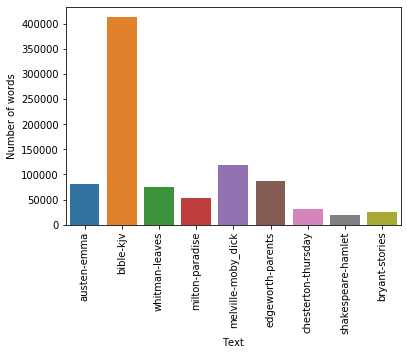

In [ ]:
sns.barplot(n_o_w['Text'],n_o_w['Number of words'],label="Number of Words")
plt.xticks(rotation=90)
plt.show()

***DEFINING ANOTHER FUNTION (random_sample) TO ASSIGN 100 WORDS TO A DOCUMENT AND PICK 150 RANDOM DOCUMENTS FROM EACH TEXT***

In [ ]:
def random_sample(list_words):
  count = 0
  str = ''
  for word in list_words:
    if count<100:
      str = str + word
      str = str+' '
      count = count + 1
    else:
      str = str+'###'
      count = 0
  strr = str.split('###')
  return random.sample(strr,150)
  

***APPLYING OF THE SECOND FUNCTION (random_sample) TO THE PROCESSED TEXTS***

In [ ]:
r_str1 = random_sample(words1)
r_str2 = random_sample(words2)
r_str3 = random_sample(words3)
r_str4 = random_sample(words4)
r_str5 = random_sample(words5)
r_str6 = random_sample(words6)
r_str7 = random_sample(words7)
r_str8 = random_sample(words8)
r_str9 = random_sample(words9)

In [ ]:
print(r_str1[4])

lady must pay subsequent object lament heat suffer walk nothing when i get donwell say knightley could find very odd unaccountable note i send morning message return certainly home till one donwell cry wife my dear mr e donwell you mean crown come meet crown no morrow i particularly want see knightley day account such dreadful broil morning i go field speak tone great ill usage make much bad and find home i assure i please and apology leave message the housekeeper declare know nothing expect very extraordinary and nobody know way go perhaps hartfield perhaps abbey mill perhaps wood 


***ASSIGNING THE NAME OF THE AUTHOR OF EACH DOCUMENT TO THE RESPECTIVE DOCUMENT***

In [ ]:
labeled_names = ([(sent, 'austen') for sent in r_str1] + [(sent, 'bible') for sent in r_str2]+[(sent, 'whitman') for sent in r_str3]+
                 [(sent, 'milton') for sent in r_str4]+[(sent, 'melville') for sent in r_str5]+[(sent, 'edgeworth') for sent in r_str6]+
								         [(sent, 'chesterton') for sent in r_str7]+[(sent, 'shakespeare') for sent in r_str8]+[(sent, 'bryant') for sent in r_str9])
pd.DataFrame(labeled_names)

,0,1
0,cautious think emma advance inch inch hazard n...,austen
1,mr dixon true indeed i think mr dixon she must...,austen
2,mr weston direct whole officiate safely hartfi...,austen
3,spot engage much benefit expect change emma he...,austen
4,lady must pay subsequent object lament heat su...,austen
...,...,...
1345,and i rather think reputation pretty well hamm...,bryant
1346,fell fairy foot but beautiful smile bid come k...,bryant
1347,giant kill after one giant leave never come co...,bryant
1348,she go straight kind sister asylum tell go giv...,bryant


***SHUFFLING THE LABELED NAMES AND VIEWING THEM IN A DATAFRAME USING PANDAS***

In [ ]:
random.shuffle(labeled_names)
labeled = pd.DataFrame(labeled_names)

***LABELING OF THE COLUMNS OF THE DATAFRAME***

In [ ]:
labeled = labeled.rename(columns={0: "Text", 1: "Author"})
labeled.head()

,Text,Author
0,front behind black group opponent could see li...,chesterton
1,innocent courtesy characteristic insist go las...,chesterton
2,nothing like fix vivid conception peril freque...,melville
3,sword also still sombre dark frock coat hat th...,chesterton
4,rise play neither let u commit fornication com...,bible


***SPLITTING OF THE DATASET***

In [ ]:
X = labeled['Text'].values
y = labeled['Author'].values

In [ ]:
pd.DataFrame(X).head()

,0
0,front behind black group opponent could see li...
1,innocent courtesy characteristic insist go las...
2,nothing like fix vivid conception peril freque...
3,sword also still sombre dark frock coat hat th...
4,rise play neither let u commit fornication com...


***TRANSFORMING OF THE AUTHOR COLUMN*** 

In [ ]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
pd.DataFrame(y).head()

,0
0,3
1,3
2,5
3,3
4,1


## **FEATURE ENGINEERING**
***TRANSFORMATION OF THE TEXT USING BAG OF WORDS***

In [ ]:
count = CountVectorizer(min_df=3, analyzer='word', ngram_range=(1,2), max_features=5000) #CONSIDERING BOTH BIGRAMS AND UNIGRAMS, IGNORING WORDS THAT HAVE A DOCUMENT FREQUENCY OF LESS THAN 3 AND CONSIDERING THE TOP 5000 FEATURES BASED ON FREQUENCY ACROSS THE CORPUS.
bow = count.fit_transform(X)
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Bow_feature_names = count.get_feature_names()

In [ ]:
X_Bow = pd.DataFrame(bow.toarray(), columns=Bow_feature_names) #VIEWING IN FORM OF A DATAFRAME

In [ ]:
X_Bow

,aaron,abbey,abbey mill,abide,abiram,able,aboard,abolish,abound,about,above,abraham,abroad,abruptly,absence,absent,absolute,absolutely,absorb,accent,accept,accident,accompany,accomplish,accord,account,accurse,accuse,achieve,acknowledge,acorn,acquaint,acquaintance,across,act,action,active,actor,actual,actually,...,yard,ye,ye come,ye hear,ye say,ye see,ye shall,ye ye,yea,year,year ago,year old,yellow,yes,yes indeed,yes say,yes yes,yesterday,yet,yield,yong,you,you good,you know,you may,you might,you must,you say,you see,you shall,you would,young,young lady,young man,young men,young woman,your,youth,zelia,zion
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
1346,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1347,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


***TRANSFORMATION OF THE TEXT USING TF-IDF***

In [ ]:
tf = TfidfVectorizer(analyzer='word',min_df= 3, ngram_range=(1, 2), max_features=5000)
Tfid = tf.fit_transform(X)
Tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfid_feature_names = tf.get_feature_names()
X_Tfid = pd.DataFrame(Tfid.toarray(), columns=tfid_feature_names)
X_Tfid

,aaron,abbey,abbey mill,abide,abiram,able,aboard,abolish,abound,about,above,abraham,abroad,abruptly,absence,absent,absolute,absolutely,absorb,accent,accept,accident,accompany,accomplish,accord,account,accurse,accuse,achieve,acknowledge,acorn,acquaint,acquaintance,across,act,action,active,actor,actual,actually,...,yard,ye,ye come,ye hear,ye say,ye see,ye shall,ye ye,yea,year,year ago,year old,yellow,yes,yes indeed,yes say,yes yes,yesterday,yet,yield,yong,you,you good,you know,you may,you might,you must,you say,you see,you shall,you would,young,young lady,young man,young men,young woman,your,youth,zelia,zion
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.060092,0.0,0.0,0.0,0.0,0.000000,0.0,0.122027,0.0,0.0,0.074057,0.0,0.109472,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.128114,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.055488,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101395,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.154537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.242573,0.0,0.0,0.108608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,0.0,0.0,0.0,0.0,0.0,0.061464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.145818,0.0,0.0
1346,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.100137,0.0,0.0
1347,0.0,0.0,0.0,0.0,0.0,0.095791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.

## ***MODELLING***

In [ ]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
rf_reg = RandomForestClassifier()

scores = []
for i in range(10):
    result = next(kf.split(X_Bow), None)
    X_train = X_Bow.iloc[result[0]]
    X_test = X_Bow.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = rf_reg.fit(X_train,y_train)
    predictions = rf_reg.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
RandomForest_Bow = np.mean(scores)
print('Average K-Fold(Random Forest- BOW) Score :' , RandomForest_Bow)

Scores from each Iteration:  [0.8814814814814815, 0.8888888888888888, 0.8814814814814815, 0.8814814814814815, 0.8888888888888888, 0.8814814814814815, 0.8814814814814815, 0.8592592592592593, 0.8814814814814815, 0.8888888888888888]
Average K-Fold(Random Forest- BOW) Score : 0.8814814814814815


In [ ]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
rf_reg = RandomForestClassifier()

scores = []
for i in range(10):
    result = next(kf.split(X_Tfid), None)
    X_train = X_Tfid.iloc[result[0]]
    X_test = X_Tfid.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = rf_reg.fit(X_train,y_train)
    predictions = rf_reg.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
RandomForest_Tfid = np.mean(scores)
print('Average K-Fold Score(Random Forest- TFid) :' , RandomForest_Tfid)

Scores from each Iteration:  [0.9037037037037037, 0.8814814814814815, 0.8962962962962963, 0.9333333333333333, 0.9111111111111111, 0.8962962962962963, 0.9185185185185185, 0.9037037037037037, 0.9037037037037037, 0.9333333333333333]
Average K-Fold Score(Random Forest- TFid) : 0.9081481481481483


In [ ]:

f = KFold(n_splits = 10, shuffle = False, random_state=None)
clf = SVC()

scores = []
for i in range(10):
    result = next(kf.split(X_Bow), None)
    X_train = X_Bow.iloc[result[0]]
    X_test = X_Bow.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
SVM_Bow = np.mean(scores)
print('Average K-Fold Score(SVM- BOW) :' , SVM_Bow)


Scores from each Iteration:  [0.9185185185185185, 0.9185185185185185, 0.9185185185185185, 0.9185185185185185, 0.9185185185185185, 0.9185185185185185, 0.9185185185185185, 0.9185185185185185, 0.9185185185185185, 0.9185185185185185]
Average K-Fold Score(SVM- BOW) : 0.9185185185185183


In [ ]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
clf = SVC()

scores = []
for i in range(10):
    result = next(kf.split(X_Tfid), None)
    X_train = X_Tfid.iloc[result[0]]
    X_test = X_Tfid.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
SVM_Tfid = np.mean(scores)
print('Average K-Fold Score(SVM- TFid) :' , SVM_Tfid)


Scores from each Iteration:  [0.9481481481481482, 0.9481481481481482, 0.9481481481481482, 0.9481481481481482, 0.9481481481481482, 0.9481481481481482, 0.9481481481481482, 0.9481481481481482, 0.9481481481481482, 0.9481481481481482]
Average K-Fold Score(SVM- TFid) : 0.9481481481481481


In [ ]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
dtc = DecisionTreeClassifier()

scores = []
for i in range(10):
    result = next(kf.split(X_Bow), None)
    X_train = X_Bow.iloc[result[0]]
    X_test = X_Bow.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = dtc.fit(X_train,y_train)
    predictions = dtc.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
DecisionTree_Bow = np.mean(scores)
print('Average K-Fold Score(Decision Tree- BOW) :' , DecisionTree_Bow)


Scores from each Iteration:  [0.6888888888888889, 0.6888888888888889, 0.7185185185185186, 0.6962962962962963, 0.6518518518518519, 0.6888888888888889, 0.674074074074074, 0.7111111111111111, 0.6888888888888889, 0.6592592592592592]
Average K-Fold Score(Decision Tree- BOW) : 0.6866666666666668


In [ ]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
dtc = DecisionTreeClassifier()

scores = []
for i in range(10):
    result = next(kf.split(X_Tfid), None)
    X_train = X_Tfid.iloc[result[0]]
    X_test = X_Tfid.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = dtc.fit(X_train,y_train)
    predictions = dtc.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
DecisionTree_Tfid = np.mean(scores)
print('Average K-Fold Score(Decision Tree- TFid) :' , DecisionTree_Tfid)

Scores from each Iteration:  [0.6962962962962963, 0.725925925925926, 0.7333333333333333, 0.725925925925926, 0.725925925925926, 0.7111111111111111, 0.6962962962962963, 0.7037037037037037, 0.725925925925926, 0.7037037037037037]
Average K-Fold Score(Decision Tree- TFid) : 0.7148148148148149


In [ ]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
neigh = KNeighborsClassifier(n_neighbors=3)

scores = []
for i in range(10):
    result = next(kf.split(X_Bow), None)
    X_train = X_Bow.iloc[result[0]]
    X_test = X_Bow.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = neigh.fit(X_train,y_train)
    predictions = neigh.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
KNN_Bow = np.mean(scores)
print('Average K-Fold Score(KNN- BOW) :' , KNN_Bow)

Scores from each Iteration:  [0.43703703703703706, 0.43703703703703706, 0.43703703703703706, 0.43703703703703706, 0.43703703703703706, 0.43703703703703706, 0.43703703703703706, 0.43703703703703706, 0.43703703703703706, 0.43703703703703706]
Average K-Fold Score(KNN- BOW) : 0.437037037037037


In [ ]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
neigh = KNeighborsClassifier(n_neighbors=3)

scores = []
for i in range(10):
    result = next(kf.split(X_Tfid), None)
    X_train = X_Tfid.iloc[result[0]]
    X_test = X_Tfid.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = neigh.fit(X_train,y_train)
    predictions = neigh.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
KNN_Tfid = np.mean(scores)
print('Average K-Fold Score(KNN- TFid) :' , KNN_Tfid)

Scores from each Iteration:  [0.8518518518518519, 0.8518518518518519, 0.8518518518518519, 0.8518518518518519, 0.8518518518518519, 0.8518518518518519, 0.8518518518518519, 0.8518518518518519, 0.8518518518518519, 0.8518518518518519]
Average K-Fold Score(KNN- TFid) : 0.8518518518518519


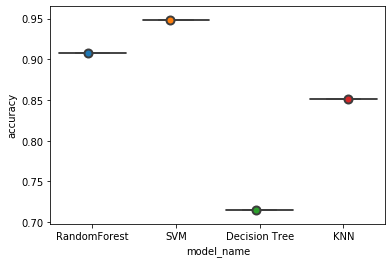

In [ ]:
entries = [('RandomForest', RandomForest_Tfid),('SVM', SVM_Tfid), ('Decision Tree', DecisionTree_Tfid), ('KNN', KNN_Tfid)]
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

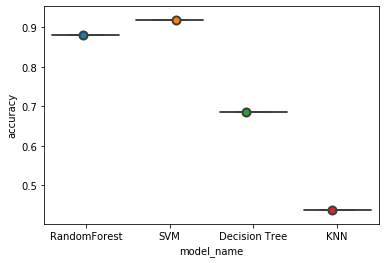

In [ ]:
entries = [('RandomForest', RandomForest_Bow),('SVM', SVM_Bow), ('Decision Tree', DecisionTree_Bow), ('KNN', KNN_Bow)]
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

### ***MODEL EVALUATION***
***SVM - TF-IDF***

In [ ]:
model = SVC()

X_train,X_test,y_train,y_test = train_test_split(X_Tfid,y, test_size=0.30, random_state=5)

In [ ]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.94      1.00      0.97        34
           2       0.96      0.96      0.96        45
           3       1.00      0.94      0.97        47
           4       0.98      0.98      0.98        51
           5       1.00      0.94      0.97        49
           6       0.96      0.96      0.96        53
           7       1.00      0.98      0.99        44
           8       0.88      1.00      0.93        43

    accuracy                           0.97       405
   macro avg       0.97      0.97      0.97       405
weighted avg       0.97      0.97      0.97       405



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[38  0  0  0  0  0  0  0  1]
 [ 0 34  0  0  0  0  0  0  0]
 [ 0  1 43  0  1  0  0  0  0]
 [ 0  0  0 44  0  0  1  0  2]
 [ 0  0  1  0 50  0  0  0  0]
 [ 0  0  1  0  0 46  0  0  2]
 [ 0  1  0  0  0  0 51  0  1]
 [ 0  0  0  0  0  0  1 43  0]
 [ 0  0  0  0  0  0  0  0 43]]


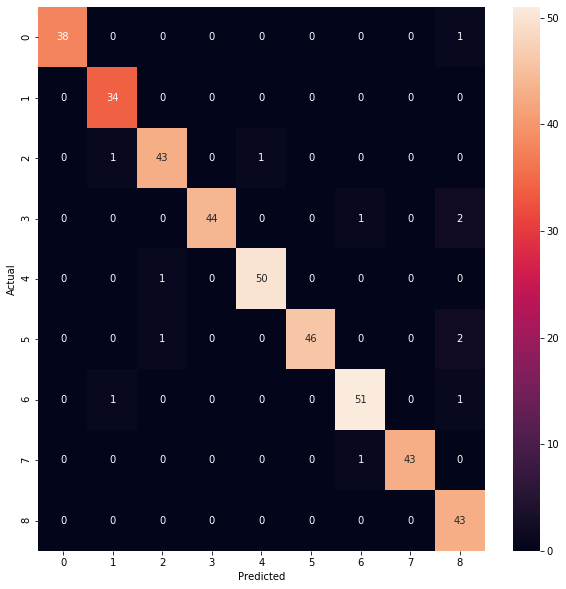

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

***ERROR ANALYSIS***

In [ ]:
encoding = [(0,'austen'),(1,'bible'),(2,'whitman'),(3,'milton'),(4,'melville'),(5, 'edgeworth'),(6,'chesterton'),(7,'shakespear'),(8,'bryant')]
auth = pd.DataFrame(encoding)
auth = auth.rename(columns={0: "Label", 1: "Author"})
print(auth)

In [ ]:
for predicted in auth.Label:
  for actual in auth.Label:
    if predicted != actual and conf_mat[actual, predicted] >= 1:
      print("'{}' predicted as '{}' : {} examples.".format(y_test[actual],y_pred[predicted], conf_mat[actual, predicted]))
      display(labeled.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Author', 'Text']])
      #print(y_test.tolist().index(actual))
      print('')